### Dataset

nb_joints = 8

```
                        |-----------------|
joint_states [qj, qdotj]|                 |
------------------------|                 |
baselink vel - BF       |                 |    tau_ff (size: nb_joints x 1)
------------------------|                 |---------------------
baselink_n, omega - BF  |                 |    q_j_des (size: nb_joints x 1)
------------------------|                 |---------------------
goal(vx_des, vy_des) BF |                 |    q_j_vel_des (size: nb_joints x 1)
------------------------|                 |---------------------
t_since_contact (R)     |                 |
t_since_no_contact (R)  |                 |    
------------------------|                 |
t_since_contact (L)     |                 |
t_since_no_contact (L)  |                 |
------------------------|                 |
pos_right_foot (BF)     |                 |
------------------------|                 |
pos_left_foot (BF)      |                 |
------------------------|-----------------|
```


BF - baselink frame

L - left

R - right

baselink_n - normal vector in body frame (i.e. n_I = [0, 0, 1], n_B = R.T@n_I)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#FREQUENCY 1000 Hz

dataset = pd.read_csv('dataset.csv')
dataset.head()
print(dataset['time'][1] - dataset['time'][0])
print(dataset['time'][2] - dataset['time'][1])
adjusted_time = dataset['time'] - dataset['time'][0]
print(adjusted_time)


In [ ]:
# plot all the joints
list_joints_names = ['YAW', 'HAA', 'HFE', 'KFE', 'ANKLE']



fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for joint_name in list_joints_names:
    axs[0,0].set_title('left joints pos')
    axs[0,0].plot(adjusted_time, dataset['L_'+ joint_name + '_pos'])
    axs[0,1].set_title('right joints pos')
    axs[0,1].plot(adjusted_time, dataset['R_'+ joint_name + '_pos'])

    axs[1,0].set_title('left joints vel')
    axs[1,0].plot(adjusted_time, dataset['L_'+ joint_name + '_vel'])
    axs[1,1].set_title('right joints vel')
    axs[1,1].plot(adjusted_time, dataset['R_'+ joint_name + '_vel'])

# print(len(dataset['L_'+ joint_name + '_pos']))


In [ ]:

plt.plot(dataset['vel_x_BF'], label='x')
plt.plot(dataset['vel_y_BF'], label='y')
plt.plot(dataset['vx_des_BF'], label='x_des')
plt.plot(dataset['vy_des_BF'], label='y_des')
plt.legend()
# Note, see the fact that we walk with higher velocity at some point (aka not walk backwards lol)

In [ ]:

plt.plot(dataset['normal_vec_x_BF'], label='x')
plt.plot(dataset['normal_vec_y_BF'], label='y')
plt.plot(dataset['normal_vec_z_BF'], label='z')
plt.legend()

In [8]:
state_columns = [
    "L_YAW_pos", "L_HAA_pos", "L_HFE_pos", "L_KFE_pos", "L_ANKLE_pos",
    "R_YAW_pos", "R_HAA_pos", "R_HFE_pos", "R_KFE_pos", "R_ANKLE_pos",
    "L_YAW_vel", "L_HAA_vel", "L_HFE_vel", "L_KFE_vel", "L_ANKLE_vel",
    "R_YAW_vel", "R_HAA_vel", "R_HFE_vel", "R_KFE_vel", "R_ANKLE_vel", 
    "vel_x_BF", "vel_y_BF", "vel_z_BF", "normal_vec_x_BF", "normal_vec_y_BF", "normal_vec_z_BF", 
    "omega_x", "omega_y", "omega_z", "vx_des_BF", "vy_des_BF", 
    "right_foot_t_since_contact", "right_foot_t_since_no_contact", 
    "right_foot_pos_x_BF", "right_foot_pos_y_BF", "right_foot_pos_z_BF",
    "left_foot_t_since_contact", "left_foot_t_since_no_contact",
    "left_foot_pos_x_BF", "left_foot_pos_y_BF", "left_foot_pos_z_BF"
]

state = dataset[state_columns].to_numpy()
state_means = np.mean(state, 0)
state_stds = np.std(state, 0)

action_columns = [
    "L_YAW_tau_ff", "L_HAA_tau_ff", "L_HFE_tau_ff", "L_KFE_tau_ff", "L_ANKLE_tau_ff",
    "R_YAW_tau_ff", "R_HAA_tau_ff", "R_HFE_tau_ff", "R_KFE_tau_ff", "R_ANKLE_tau_ff",
    "L_YAW_q_des", "L_HAA_q_des", "L_HFE_q_des", "L_KFE_q_des", "L_ANKLE_q_des",
    "R_YAW_q_des", "R_HAA_q_des", "R_HFE_q_des", "R_KFE_q_des", "R_ANKLE_q_des",
    "L_YAW_q_vel des", "L_HAA_q_vel des", "L_HFE_q_vel des", "L_KFE_q_vel des", "L_ANKLE_q_vel des",
    "R_YAW_q_vel des", "R_HAA_q_vel des", "R_HFE_q_vel des", "R_KFE_q_vel des", "R_ANKLE_q_vel des"
]

action = dataset[action_columns].to_numpy()
action_means = np.mean(action, 0)
action_stds = np.std(action, 0)

In [11]:
print(state_means)
print(state_means == 0)
print(state_columns[-6])

[-4.56787407e-04 -1.09177744e-01  8.08806695e-01 -1.28167406e+00
  3.87644949e-01 -7.47006518e-04  9.78293159e-02  8.43807473e-01
 -1.26811855e+00  3.29656052e-01  1.35687292e-04 -2.50620067e-03
 -6.72942795e-04  2.32675877e-03 -1.65159255e-03 -1.11130434e-04
 -1.38965692e-03  8.83909547e-04 -1.14768245e-03  3.04545730e-04
 -1.74039562e-01  1.20544552e-03  5.03210465e-04 -6.93898609e-04
  5.05495975e-04  9.99237161e-01 -9.09510234e-05  2.42114093e-03
  1.82811675e-02  1.69947507e-02  1.18562219e-05 -4.09220584e-02
 -5.84621581e-02 -5.19637621e-01  1.55774170e-01  0.00000000e+00
 -2.48428723e-02  5.28185934e-02 -5.19336045e-01  1.58553181e-01
  6.38576612e+01]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False]
right_foot_pos_z_BF


In [13]:
print(state_stds)
print(state_stds == 0)
print(state_columns[-6])

[3.49870079e-03 6.21958663e-02 1.47134487e-01 2.31865356e-01
 1.00060455e-01 4.56425970e-03 6.33595965e-02 1.43059716e-01
 2.41482708e-01 1.06872200e-01 2.06775569e-01 1.05307016e+00
 2.68934758e+00 4.36657490e+00 3.57478392e+00 2.46382049e-01
 1.18730868e+00 2.61054123e+00 4.41668262e+00 3.40386970e+00
 1.28213647e-01 2.06589534e-01 1.18798596e-01 1.18183065e-02
 3.72027800e-02 8.00140832e-04 6.42078582e-01 3.66103115e-01
 2.97670397e-01 2.39967110e-02 4.43748996e-02 2.75323941e-02
 4.55039989e-02 3.86907783e-02 1.81466877e-01 0.00000000e+00
 2.91370439e-02 4.62556344e-02 3.78228002e-02 1.83388394e-01
 3.25667489e+01]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False]
right_foot_pos_z_BF


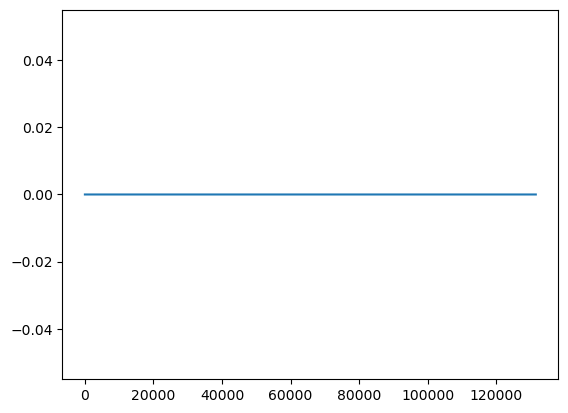

In [12]:
plt.plot(dataset[state_columns[-6]])